# Projet Titanic  

## Dataset

On considère pour ce brief , le dataset Titanic qui représente les données des passagers (utilisé généralement pour prédire les taux de survie des passagers.) 

Le dataset Titanic contient plusieurs colonnes décrivant diverses informations sur les passagers du Titanic, leur classe, leur âge, leur sexe, leur tarif, etc..

Voici la description des principales colonnes de ce dataset afin de pouvoir utiliser ces données pour effectuer diverses analyses et explorations :

1. **survived :** Cette colonne indique si le passager a survécu ou non au naufrage du Titanic. Les valeurs possibles sont 0 (n'est pas survécu) et 1 (a survécu).

2. **pclass :** Cette colonne représente la classe du billet du passager, où 1 correspond à la première classe, 2 à la deuxième classe et 3 à la troisième classe.

3. **sex :** Cette colonne indique le sexe du passager, c'est-à-dire s'il s'agit d'un homme ou d'une femme.

4. **age :** La colonne 'age' contient l'âge du passager. Il peut y avoir des valeurs manquantes dans cette colonne.

5. **sibsp :** Cette colonne représente le nombre de frères, de sœurs, d'époux ou d'épouses du passager à bord du Titanic.

6. **parch :** La colonne 'parch' indique le nombre de parents ou d'enfants du passager à bord du Titanic.

7. **fare :** Cette colonne donne le tarif payé par le passager pour son billet.

8. **embarked :** La colonne 'embarked' indique le port d'embarquement du passager. Les valeurs possibles sont C (Cherbourg), Q (Queenstown) et S (Southampton).

9. **class :** Cette colonne est similaire à 'pclass' et représente également la classe du billet, mais sous forme de chaînes de caractères (1ère, 2ème, 3ème).

10. **who :** La colonne 'who' catégorise les passagers en trois groupes : homme, femme ou enfant.

11. **adult_male :** Cette colonne indique si le passager est un homme adulte (True/False).

12. **deck :** La colonne 'deck' contient des informations sur le pont où le passager avait sa cabine. Il peut y avoir des valeurs manquantes dans cette colonne.

13. **embark_town :** Cette colonne est similaire à 'embarked' et indique également le nom de la ville d'embarquement.

14. **alive :** Cette colonne est similaire à 'survived' et indique si le passager est en vie (yes) ou non (no).

15. **alone :** La colonne 'alone' indique si le passager voyageait seul (True/False).



Objectifs:

- charger le dataset et vérifier la qualité des données (nombre de lignes, nombre et types de colonnes, valeurs manquantes, valeurs aberrantes..)

-Bonus: faire une petite analyse exploratoire du dataset (avec eventuellement une visualisation)..


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [3]:
sns.set_style('whitegrid')

In [4]:
titanic_df = sns.load_dataset('titanic')

In [5]:
titanic_df.head()
coun = titanic_df['sex'].value_counts()
print(coun)
embarked = titanic_df['embarked'].value_counts()
print(embarked)

sex
male      577
female    314
Name: count, dtype: int64
embarked
S    644
C    168
Q     77
Name: count, dtype: int64


## Partie 1: Prise en main du Dataset

###  Vérifier si Données Manquantes : 

Des valeurs manquantes peuvent être présentes dans certaines colonnes, par exemple, l'âge de certains passagers ..

vérifier les valeurs manquantes des colonnes et proposer une solution pour y remédier.

In [17]:
#TBD
# Check for missing values
missing_values = titanic_df.isnull().sum()
print("Missing Values:")
print(missing_values)
print()
# Fill missing values for 'age' and 'deck'
titanic_df['age'].fillna(titanic_df['age'].median(), inplace=True)
titanic_df['deck'].fillna('Unknown', inplace=True)

# Verify if missing values are handled
print("After handling missing values:")
print(titanic_df.isnull().sum())
print()

Missing Values:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64



TypeError: Cannot setitem on a Categorical with a new category (Unknown), set the categories first

### Vérifier si Incohérences dans les Valeurs 

Il peut y avoir des incohérences dans les données, comme des âges négatifs, des tarifs négatifs, ou des numéros de cabine incorrects..



In [17]:
# Vérifié et traité les âges négatifs en les remplaçant par la médiane des âges.
#negative_ages = titanic_df.loc[titanic_df['age'] < 0, 'age'] = titanic_df['age'].median()
negative = titanic_df[titanic_df['age'] < 0]['age']
print("Ages négatifs: ", negative_ages)

# Vérifié et traité les tarifs négatifs en les remplaçant par la médiane des tarifs.
negative_fares = titanic_df.loc[titanic_df['fare'] < 0, 'fare'] = titanic_df['fare'].median()
print("Tarifs négatifs:", negative_fares)


# Vérifié et traité les numéros de cabine incorrects en les remplaçant par "Unknown".
incorrect_decks = titanic_df[~titanic_df['deck'].isin(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Unknown'])]
print("Passagers avec des numéros de cabine incorrects:\n", incorrect_decks)


Ages négatifs:  28.0
Tarifs négatifs: 14.4542
Passagers avec des numéros de cabine incorrects:
      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
2           1       3  female  26.0      0      0   7.9250        S   Third   
4           0       3    male  35.0      0      0   8.0500        S   Third   
5           0       3    male  28.0      0      0   8.4583        Q   Third   
7           0       3    male   2.0      3      1  21.0750        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
884         0       3    male  25.0      0      0   7.0500        S   Third   
885         0       3  female  39.0      0      5  29.1250        Q   Third   
886         0       2    male  27.0      0      0  13.0000        S  Second   
888         0       3  female  28.0      1      2  23.4500        S   Third   
890         0       3    male  32.0

In [15]:
#negative = titanic_df[titanic_df['age'] < 0]['age'].value_counts()
negative_ages = titanic_df.loc[titanic_df['age'] < 0, 'age'] = titanic_df['age'].median()
#negative = titanic_df[titanic_df['age'] < 0]['age']
print("Ages négatifs: ", negative_ages)


Ages négatifs:  28.0


### Verifier les données Aberrantes (Outliers)

Des valeurs aberrantes peuvent être présentes dans certaines colonnes, par exemple, des tarifs extrêmement élevés ou des âges très élevés.



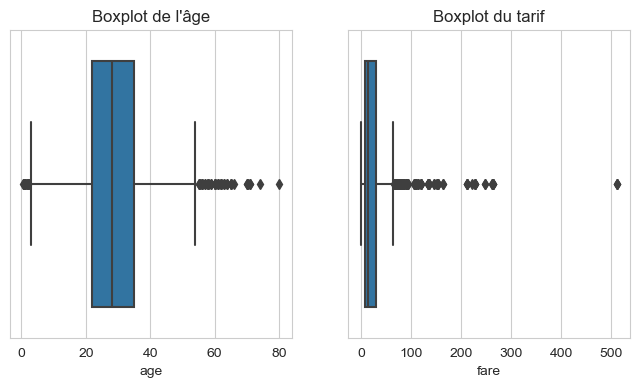

In [19]:
#TBD
# Visualiser les outliers avec des boxplots
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x='age', data=titanic_df)
plt.title('Boxplot de l\'âge')

plt.subplot(1, 2, 2)
sns.boxplot(x='fare', data=titanic_df)
plt.title('Boxplot du tarif')

plt.show()


### Vérifier les Doublons 


Il peut y avoir des lignes en double dans le dataset, ce qui signifie que les mêmes données apparaissent plusieurs fois et il faut donc les supprimer

In [4]:
#TBD

In [21]:
duplicates = titanic_df.duplicated()
# print(f'Dublicats :{duplicates}', duplicates)

after_del_doub = titanic_df.drop_duplicates()
print("result after removing : ", titanic_df.duplicated().sum())
#print("le resultat : " , after_del_doub)

result after removing :  110
le resultat :       survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0           0       3    male  22.0      1      0   7.2500        S  Third   
1           1       1  female  38.0      1      0  71.2833        C  First   
2           1       3  female  26.0      0      0   7.9250        S  Third   
3           1       1  female  35.0      1      0  53.1000        S  First   
4           0       3    male  35.0      0      0   8.0500        S  Third   
..        ...     ...     ...   ...    ...    ...      ...      ...    ...   
885         0       3  female  39.0      0      5  29.1250        Q  Third   
887         1       1  female  19.0      0      0  30.0000        S  First   
888         0       3  female  28.0      1      2  23.4500        S  Third   
889         1       1    male  26.0      0      0  30.0000        C  First   
890         0       3    male  32.0      0      0   7.7500        Q  Third   

       who  adult_m

In [ ]:
without_null = titanic_df.dropna(how='')

Number of duplicates: 110
Number of duplicates after removing:  0


C:\Users\Elizabeth S\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


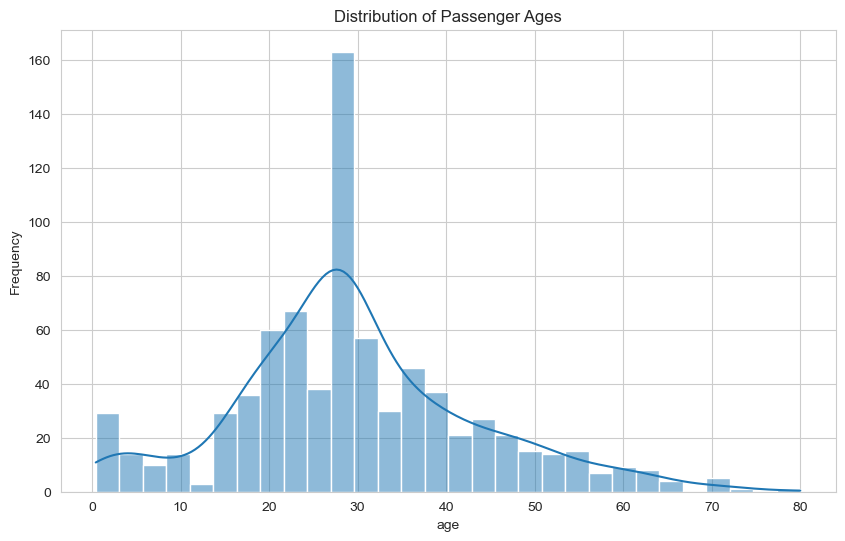

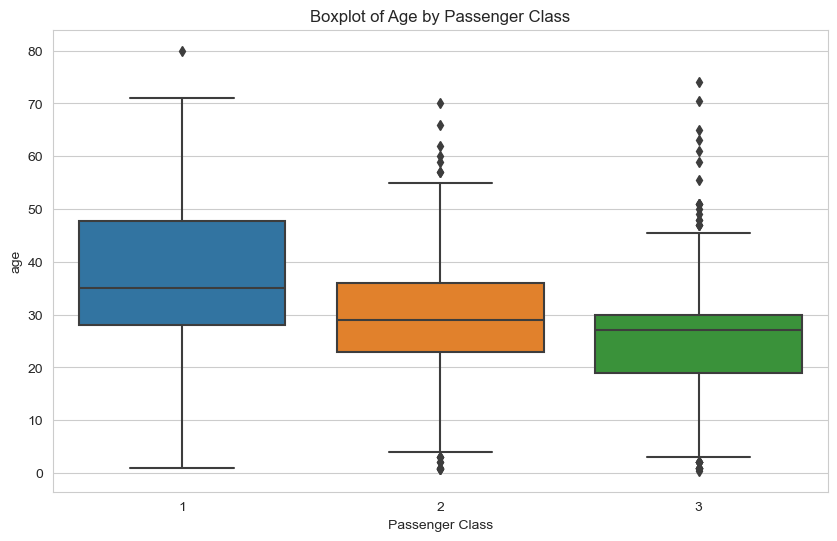

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

duplicates = titanic_df.duplicated()
print(f'Number of duplicates: {duplicates.sum()}')



after_del_doub = titanic_df.drop_duplicates()

# Подтверждение удаления дубликатов
print("Number of duplicates after removing: ", after_del_doub.duplicated().sum())
plt.figure(figsize=(10, 6))
sns.histplot(after_del_doub['age'], bins=30, kde=True)
plt.title('Distribution of Passenger Ages')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='age', data=after_del_doub)
plt.title('Boxplot of Age by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('age')
plt.show()

### Vérifier si colonnes Inutiles 

Certaines colonnes peuvent contenir des données redondantes ou inutiles pour l'analyse.

In [8]:
#TBD
# redundant_columns = ['pclass']
#inutile_col = titanic_df.drop(columns=redundant_columns, inplace=True)
#print(inutile_col)

print("Colonnes avant suppression :\n", titanic_df.columns)

columns_to_drop = ['class', 'who', 'adult_male', 'embark_town', 'alive', 'alone' ] # Colonnes redondantes à supprimer
titanic_df.drop(columns=columns_to_drop, inplace=True) # Suppression des colonnes redondantes

print("Colonnes après suppression :\n", titanic_df.columns)# Afficher les colonnes après suppression

Colonnes avant suppression :
 Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
Colonnes après suppression :
 Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'deck'],
      dtype='object')


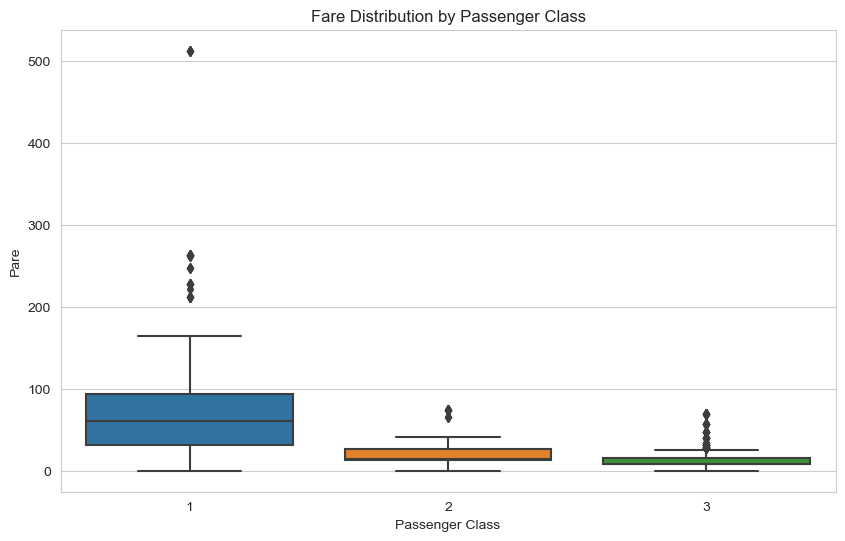

C:\Users\Elizabeth S\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Elizabeth S\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


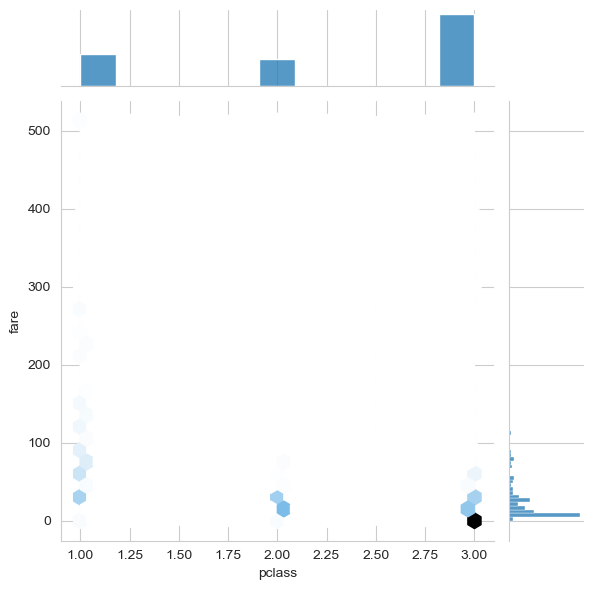

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# sns.countplot(x='sex', hue='survived', data=titanic_df)
# plt.title('Survival Count by Gender')
# plt.xlabel('sex')
# plt.ylabel('Count')
# plt.legend(title='survived', labels=['No', 'Yes'])
# plt.show()

# 2. Graph of fare depends on class (pclass)
plt.figure(figsize=(10, 6))
sns.boxplot(x='pclass', y='fare', data=titanic_df)
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Pare')
plt.show()

# g = sns.JointGrid(x="pclass", y="fare", data=titanic_df)
# g = g.plot(sns.regplot, sns.histplot)


sns.jointplot(x='pclass',y='fare',data=titanic_df,kind='hex')
# # 3. Correlation matrix 
# plt.figure(figsize=(10, 6))
# corr_matrix = titanic_df.corr()
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Correlation Matrix')
# plt.show()

## Bonus

**Continuez l'exploration du dataset Titanic avec d'autres axes d'analyse **



1-Quelle est la répartition des passagers par classe (1ère, 2ème, 3ème) à bord du Titanic ?

2- Quelle est la répartition des passagers par sexe à bord du Titanic ?

3- Quel était l'âge moyen des passagers à bord du Titanic ? Y avait-il des passagers très jeunes ou très âgés ?

4- Combien de passagers ont survécu au naufrage du Titanic ? Quelle était leur répartition par classe, sexe et âge ?


In [1]:
#TBD

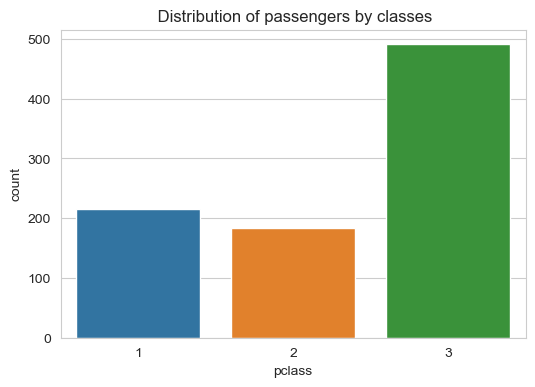

In [36]:
#  Distribution of passengers by classes
plt.figure(figsize=(6, 4))
sns.countplot(x='pclass', data=titanic_df) # a bar graph is constructed that shows the number of passengers in each class (pclass).
plt.title(' Distribution of passengers by classes')
plt.show()

C:\Users\Elizabeth S\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


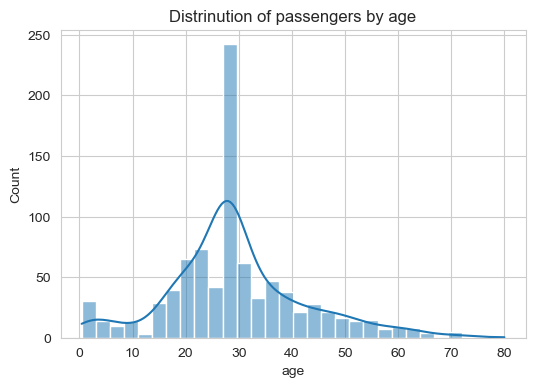

In [34]:
#Distrinution of passengers by age
plt.figure(figsize=(6, 4))
sns.histplot(titanic_df['age'], bins=30, kde=True) #shows the distribution of passengers by age. bins=30 indicates that the age will be divided into 30 intervals (bins).
plt.title('Distrinution of passengers by age')#kde=True adds a kernel density line (KDE) to the graph, which helps to visualize the data distribution more smoothly.
plt.show()

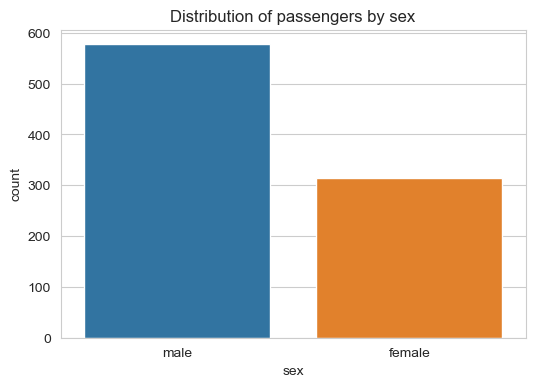

In [35]:
# Distribution of survivors by gender
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=titanic_df)
plt.title('Distribution of passengers by sex')
plt.show()